# CNN CIFAR10

CNN classification on the CIFAR10 dataset using the TF funcational API

## Import Packages

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
print(tf.__version__)

2.3.1


## Load Data

In [2]:

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0 , x_test/255.0
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

170500096/170498071 [==============================] - 7s 0us/step
x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [3]:
# reshape targets
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000,)
y_test Shape: (10000,)


In [4]:
# Get number of classes
K = len(set(y_train))
print("Number of classes", K)

Number of classes 10


## Build Model

In [6]:
# Using the functional API
i = Input(shape=x_train[0].shape) #input shape is 3d so no reshapping needed
x = Conv2D(32,(3,3), strides=2, activation='relu')(i) # 32 = output filters
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [7]:
# compile model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [8]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5887 - accuracy: 0.4149 - val_loss: 1.3277 - val_accuracy: 0.5218
Epoch 2/15
1563/1563 [==============================] - 13s 9ms/step - loss: 1.3048 - accuracy: 0.5297 - val_loss: 1.1497 - val_accuracy: 0.5929
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1728 - accuracy: 0.5815 - val_loss: 1.1046 - val_accuracy: 0.6064
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0850 - accuracy: 0.6125 - val_loss: 1.0035 - val_accuracy: 0.6450
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0168 - accuracy: 0.6382 - val_loss: 0.9546 - val_accuracy: 0.6655
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9609 - accuracy: 0.6583 - val_loss: 0.9267 - val_accuracy: 0.6741
Epoch 7/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9136 - accuracy: 0.6744 - val_loss: 0.9023 - val_a

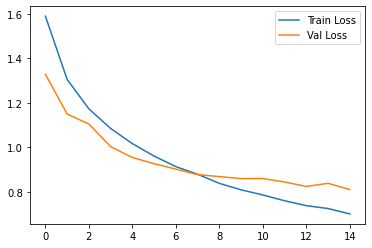

In [9]:
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend();

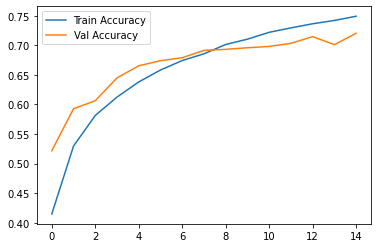

In [10]:
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Val Accuracy")
plt.legend();

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Confusion matrix, without normalization
[[722  24  50  11  12   4  12   8 100  57]
 [ 12 843   4   7   2   5  10   2  21  94]
 [ 54  13 626  62  70  54  61  33  17  10]
 [ 15  13  86 496  46 162  93  54  11  24]
 [ 24   6  85  58 636  41  57  75  12   6]
 [ 10   8  65 196  34 581  32  57   8   9]
 [  6  11  35  49  25  23 832   5  10   4]
 [ 12   3  29  34  48  51  12 790   2  19]
 [ 33  26  12   9   4   5   2   5 871  33]
 [ 22  95   6  22   1   2   7  13  24 808]]


NameError: name 'np' is not defined